In [1]:
from scripts import project_functions # This is called a relative import
from scripts import vari
    
clean_2015 = project_functions.hap_load_and_process(vari.h2015_data, vari.dict_2015,vari.list_2015)
clean_2016 = project_functions.hap_load_and_process(vari.h2016_data, vari.dict_2016,vari.list_2016)
clean_2017 = project_functions.hap_load_and_process(vari.h2017_data, vari.dict_2017,vari.list_2017)
clean_2018 = project_functions.hap_load_and_process(vari.h2018_data, vari.dict_2018,vari.list_2018)
clean_2019 = project_functions.hap_load_and_process(vari.h2019_data, vari.dict_2019,vari.list_2019)


clean_alco=project_functions.ind_load_and_process(vari.alco,'alco')
clean_alco=project_functions.clean_ind(clean_alco)
clean_alco=clean_alco.drop_duplicates()
clean_alco=clean_alco.reset_index(drop=True)
melted_clean_alco = clean_alco.melt(id_vars=['country','period'],value_vars = 'clean_alco',var_name='Variable',value_name='alco')
melted_clean_alco=melted_clean_alco.drop_duplicates()
melted_clean_alco=melted_clean_alco.reset_index(drop=True)


clean_homi=project_functions.ind_load_and_process(vari.homi,'homi')
clean_homi=project_functions.clean_ind(clean_homi)
clean_homi=clean_homi.drop_duplicates()
clean_homi=clean_homi.reset_index(drop=True)
melted_clean_homi = clean_homi.melt(id_vars=['country','period'],value_vars = 'clean_homi',var_name='Variable',value_name='homi')
melted_clean_homi=melted_clean_homi.drop_duplicates()
melted_clean_homi=melted_clean_homi.reset_index(drop=True)


clean_road=project_functions.ind_load_and_process(vari.road,'road')
clean_road=project_functions.clean_ind(clean_road)
clean_road=clean_road.drop_duplicates()
clean_road=clean_road.reset_index(drop=True)
melted_clean_road = clean_road.melt(id_vars=['country','period'],value_vars = 'road_acc',var_name='Variable',value_name='road')
melted_clean_road=melted_clean_road.drop_duplicates()
melted_clean_road=melted_clean_road.reset_index(drop=True)


clean_suic=project_functions.ind_load_and_process(vari.suic,'suic')
clean_suic=project_functions.clean_ind(clean_suic)
clean_suic=clean_suic.drop_duplicates()
clean_suic=clean_suic.reset_index(drop=True)
melted_clean_suic = clean_suic.melt(id_vars=['country','period'],value_vars = 'clean_suic',var_name='Variable',value_name='suic')
melted_clean_suic=melted_clean_suic.drop_duplicates()
melted_clean_suic=melted_clean_suic.reset_index(drop=True)
clean_road

#print(s.replace(' ', ''))

/var/folders/wm/gwszwg0521zgk9f5t950gp6r0000gn/T/ipykernel_78137/89651635.py:15: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  melted_clean_alco = clean_alco.melt(id_vars=['country','period'],value_vars = 'clean_alco',var_name='Variable',value_name='alco')
/var/folders/wm/gwszwg0521zgk9f5t950gp6r0000gn/T/ipykernel_78137/89651635.py:24: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  melted_clean_homi = clean_homi.melt(id_vars=['country','period'],value_vars = 'clean_homi',var_name='Variable',value_name='homi')
/var/folders/wm/gwszwg0521zgk9f5t950gp6r0000gn/T/ipykernel_78137/89651635.py:33: FutureWarning: This dataframe

,country,period,road
0,Afghanistan,2015,4942
1,Afghanistan,2016,5240
2,Afghanistan,2017,5490
3,Afghanistan,2018,5295
4,Afghanistan,2019,6033
...,...,...,...
910,Zimbabwe,2015,5353
911,Zimbabwe,2016,5601
912,Zimbabwe,2017,5702
913,Zimbabwe,2018,5867


In [2]:
data_frames=[clean_2015,clean_2016,clean_2017,clean_2018,clean_2019]


hap_merged= project_functions.reduce(lambda  left,right: project_functions.pd.merge(left,right,on=['country'],
                                            how='inner'), data_frames)

master_data=hap_merged[['country','2015','2016','2017','2018','2019']]

just_scores=project_functions.pd.melt(master_data, id_vars=['country'], value_vars=['2015', '2016','2017', '2018','2019'])
just_scores=just_scores.rename(columns={"variable":"period","value":"h_index"})
just_scores=just_scores.sort_values(['country','period'],ascending=[True, True], ignore_index=True)
#just_scores=just_scores.sort_values(sorted(list(just_scores[['country']])), ignore_index=True)
#df.sort_values(['a', 'b'], ascending=[True, False])
just_scores['period']=just_scores['period'].astype(int)
just_scores

,country,period,h_index
0,Afghanistan,2015,3.575
1,Afghanistan,2016,3.360
2,Afghanistan,2017,3.794
3,Afghanistan,2018,3.632
4,Afghanistan,2019,3.203
...,...,...,...
700,Zimbabwe,2015,4.610
701,Zimbabwe,2016,4.193
702,Zimbabwe,2017,3.875
703,Zimbabwe,2018,3.692


In [3]:

melted_clean_alco=project_functions.pd.merge(just_scores,melted_clean_alco, on=['country','period'],how='inner')[['country','period','Variable','alco']]
#melted_clean_alco=melted_clean_alco.rename(columns={'value':'alco'})

melted_clean_homi=project_functions.pd.merge(just_scores,melted_clean_homi, on=['country','period'],how='inner')[['country','period','Variable','homi']]
#melted_clean_homi=melted_clean_homi.rename(columns={'value':'homi'})

melted_clean_road=project_functions.pd.merge(just_scores,melted_clean_road, on=['country','period'],how='inner')[['country','period','Variable','road']]
#melted_clean_road=melted_clean_road.rename(columns={'value':'road'})

melted_clean_suic=project_functions.pd.merge(just_scores,melted_clean_suic, on=['country','period'],how='inner')[['country','period','Variable','suic']]
#melted_clean_suic=melted_clean_suic.rename(columns={'value':'suic'})


In [42]:
data=[just_scores,melted_clean_alco,melted_clean_homi,melted_clean_road,melted_clean_suic]

final_merged= project_functions.reduce(lambda  left,right: project_functions.pd.merge(left,right,on=['country','period'],
                                            how='inner'), data)

final_merged=final_merged.drop_duplicates()

final_merged[['period','h_index','alco','homi','road','suic']] = final_merged[['period','h_index','alco','homi','road','suic']].apply(project_functions.pd.to_numeric)
final_merged.to_csv('../../data/processed/h_ind_merged.csv',index=False)
#making str to num: https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma/

Text(0.5, 0.98, 'Happiness by Indicators')

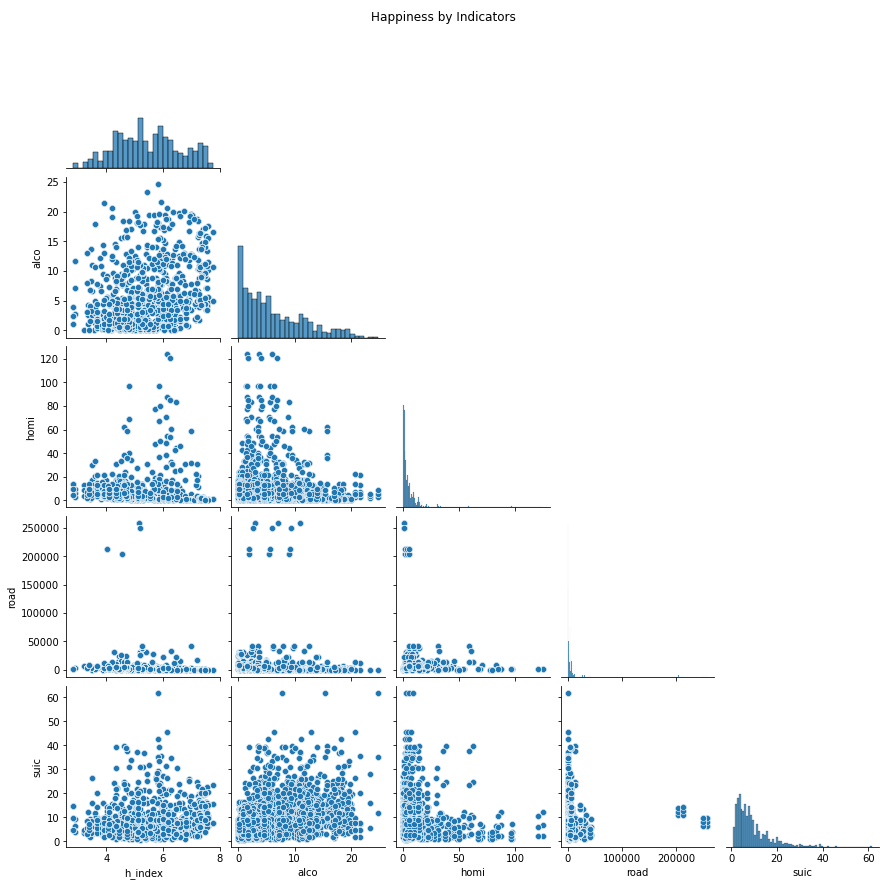

In [5]:
# Your Solution here
ax=project_functions.sns.pairplot(final_merged[['h_index','alco','homi','road','suic']], corner=True)
ax.fig.suptitle('Happiness by Indicators') #just setting title displays title on each plot


'\nimport seaborn as sns\nimport matplotlib.pyplot as plt\npenguins = sns.load_dataset("penguins")\nhexplot = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex", label=\'Blah\')\nplt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible\ncbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height\nplt.colorbar(cax=cbar_ax)\n\n# Source: https://www.py4u.net/discuss/159621\n'

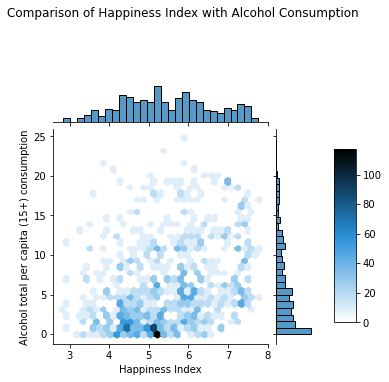

In [39]:
import matplotlib.pyplot as plt

figure1=project_functions.sns.jointplot(data=final_merged, x='h_index', y='alco', kind="hex")
#figure1.set(xlabel = "Happiness Index",ylabel='Alcohol Consumption',title='Comparison of Happiness Index with Alcohol Consumption')
figure1.fig.suptitle('Comparison of Happiness Index with Alcohol Consumption')
figure1.set_axis_labels(xlabel = "Happiness Index",ylabel='Alcohol total per capita (15+) consumption')
#figure1.colorbar()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = figure1.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
figure1.savefig('Hindex_alco.png')

'''
import seaborn as sns
import matplotlib.pyplot as plt
penguins = sns.load_dataset("penguins")
hexplot = sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind="hex", label='Blah')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)

# Source: https://www.py4u.net/discuss/159621
'''

#add legend/ color scale

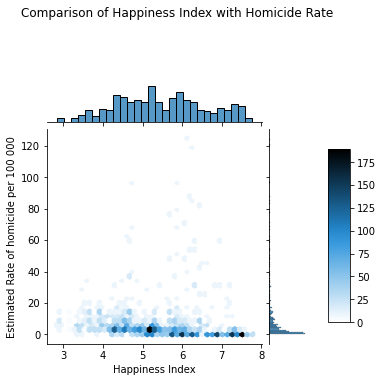

In [38]:
figure2=project_functions.sns.jointplot(data=final_merged, x='h_index', y='homi', kind="hex")
#figure1.set(xlabel = "Happiness Index",ylabel='Alcohol Consumption',title='Comparison of Happiness Index with Alcohol Consumption')
figure2.fig.suptitle('Comparison of Happiness Index with Homicide Rate')
figure2.set_axis_labels(xlabel = "Happiness Index",ylabel='Estimated Rate of homicide per 100 000')
#figure1.colorbar()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = figure2.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
figure2.savefig('Hindex_homi.png')

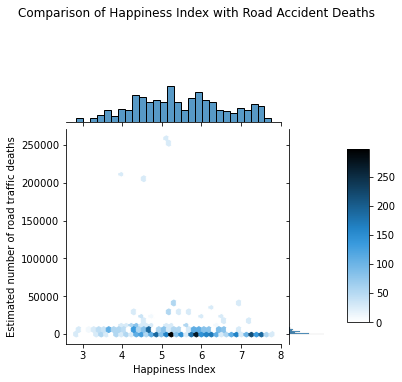

In [40]:
figure3=project_functions.sns.jointplot(data=final_merged, x='h_index', y='road', kind="hex")
#figure1.set(xlabel = "Happiness Index",ylabel='Alcohol Consumption',title='Comparison of Happiness Index with Alcohol Consumption')
figure3.fig.suptitle('Comparison of Happiness Index with Road Accident Deaths')
figure3.set_axis_labels(xlabel = "Happiness Index",ylabel='Estimated number of road traffic deaths')
#figure1.colorbar()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = figure3.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
figure3.savefig('Hindex_road.png')

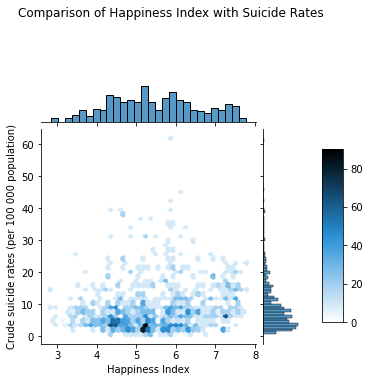

In [41]:
figure4=project_functions.sns.jointplot(data=final_merged, x='h_index', y='suic', kind="hex")
#figure1.set(xlabel = "Happiness Index",ylabel='Alcohol Consumption',title='Comparison of Happiness Index with Alcohol Consumption')
figure4.fig.suptitle('Comparison of Happiness Index with Suicide Rates')
figure4.set_axis_labels(xlabel = "Happiness Index",ylabel='Crude suicide rates (per 100 000 population)')
#figure1.colorbar()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  # shrink fig so cbar is visible
cbar_ax = figure4.fig.add_axes([.85, .25, .05, .4])  # x, y, width, height
plt.colorbar(cax=cbar_ax)
figure4.savefig('Hindex_suic.png')

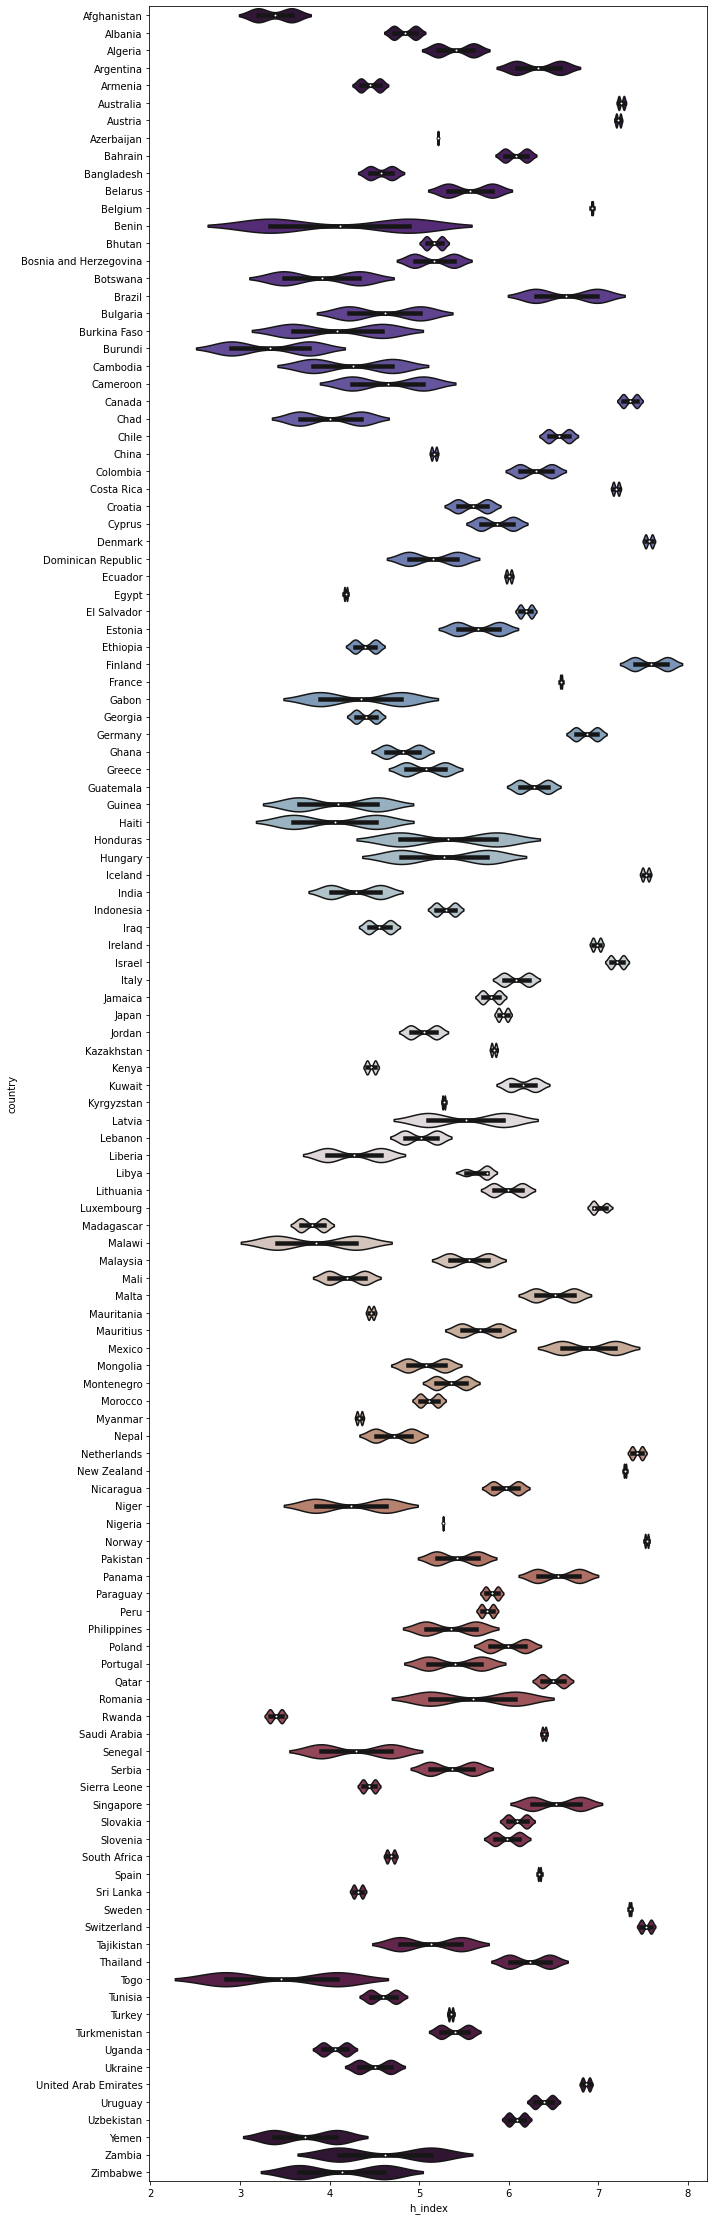

In [15]:
project_functions.pyplot.figure(figsize=(10, 40))
ax = project_functions.sns.violinplot(x="h_index", y='country',data=final_merged,palette="twilight_shifted",scale="width")
#ax.set(xlabel = "Cumulative Score (20% HP, 40% Attack, 30% Defense, 10% Speed)",ylabel=None,title='Pokemon Types sorted by Cumulative Scores')
#ax.tick_params(axis='y', labelsize= 12)